In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [17]:
from pyproj import datadir, CRS
import os

# Set PROJ data path
proj_path = r"C:\Users\Shivam\miniconda3\envs\myenv\Library\share\proj"
datadir.set_data_dir(proj_path)
os.environ["PROJ_LIB"] = proj_path
os.environ["PROJ_DATA"] = proj_path

In [3]:
df = pd.read_csv('../../data/preprocessed/firms/fires_viirs_2016_2019.csv')

In [4]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry
0,28.81234,80.13033,327.46,0.53,0.67,2016-01-01,654,N,VIIRS,n,2,292.56,2.95,D,0,POINT (80.13033 28.81234)
1,30.08359,80.61744,332.06,0.46,0.64,2016-01-01,655,N,VIIRS,n,2,275.95,7.18,D,0,POINT (80.61744 30.08359)
2,28.83003,78.46458,326.37,0.37,0.58,2016-01-01,835,N,VIIRS,n,2,295.62,2.40,D,0,POINT (78.46458 28.83003)
3,28.83331,78.08436,367.00,0.35,0.57,2016-01-01,835,N,VIIRS,h,2,295.62,10.96,D,0,POINT (78.08436 28.83331)
4,29.12486,78.40948,340.15,0.37,0.58,2016-01-01,835,N,VIIRS,n,2,295.09,2.67,D,0,POINT (78.40948 29.12486)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102335 entries, 0 to 102334
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    102335 non-null  float64
 1   longitude   102335 non-null  float64
 2   brightness  102335 non-null  float64
 3   scan        102335 non-null  float64
 4   track       102335 non-null  float64
 5   acq_date    102335 non-null  object 
 6   acq_time    102335 non-null  int64  
 7   satellite   102335 non-null  object 
 8   instrument  102335 non-null  object 
 9   confidence  102335 non-null  object 
 10  version     102335 non-null  int64  
 11  bright_t31  102335 non-null  float64
 12  frp         102335 non-null  float64
 13  daynight    102335 non-null  object 
 14  type        102335 non-null  int64  
 15  geometry    102335 non-null  object 
dtypes: float64(7), int64(3), object(6)
memory usage: 12.5+ MB


In [6]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,version,bright_t31,frp,type
count,102335.000000,102335.000000,102335.000000,102335.000000,102335.000000,102335.000000,102335.0,102335.000000,102335.000000,102335.000000
mean,29.630805,79.364950,324.715711,0.452378,0.465319,1365.124092,2.0,296.947749,4.115218,0.002316
std,0.585211,0.947578,17.827518,0.082267,0.108942,629.639412,0.0,9.271604,5.477946,0.069511
min,28.800010,77.500030,295.010000,0.320000,0.360000,639.000000,2.0,249.420000,0.110000,0.000000
25%,29.114160,78.610375,306.800000,0.390000,0.370000,749.000000,2.0,289.990000,1.310000,0.000000
50%,29.585520,79.374050,329.950000,0.430000,0.430000,840.000000,2.0,295.600000,2.710000,0.000000
75%,30.033575,80.115145,338.330000,0.500000,0.540000,2026.000000,2.0,304.330000,5.060000,0.000000
max,31.299620,81.200000,367.000000,0.800000,0.780000,2142.000000,2.0,360.450000,171.800000,3.000000


In [12]:
df.dropna(subset=['latitude', 'longitude'], inplace=True)

In [13]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month

In [9]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry,year,month
0,28.81234,80.13033,327.46,0.53,0.67,2016-01-01,654,N,VIIRS,n,2,292.56,2.95,D,0,POINT (80.13033 28.81234),2016,1
1,30.08359,80.61744,332.06,0.46,0.64,2016-01-01,655,N,VIIRS,n,2,275.95,7.18,D,0,POINT (80.61744 30.08359),2016,1
2,28.83003,78.46458,326.37,0.37,0.58,2016-01-01,835,N,VIIRS,n,2,295.62,2.40,D,0,POINT (78.46458 28.83003),2016,1
3,28.83331,78.08436,367.00,0.35,0.57,2016-01-01,835,N,VIIRS,h,2,295.62,10.96,D,0,POINT (78.08436 28.83331),2016,1
4,29.12486,78.40948,340.15,0.37,0.58,2016-01-01,835,N,VIIRS,n,2,295.09,2.67,D,0,POINT (78.40948 29.12486),2016,1


In [18]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs="EPSG:4326")

In [25]:
gdf['latitude'].min(), df['latitude'].max()

(np.float64(28.80001), np.float64(31.29962))

In [26]:
gdf['longitude'].min(), df['longitude'].max()

(np.float64(77.50003), np.float64(81.2))

In [30]:
print("Total detections: ", len(gdf))
print(gdf['confidence'].value_counts())

Total detections:  102335
confidence
n    90054
l    10418
h     1863
Name: count, dtype: int64


In [32]:
gdf.groupby('year')['frp'].mean()

year
2016    4.063306
2017    4.208382
2018    4.319683
2019    3.968513
Name: frp, dtype: float64

In [34]:
gdf.groupby('year')['frp'].std()

year
2016    5.846927
2017    5.004105
2018    5.402503
2019    5.036151
Name: frp, dtype: float64

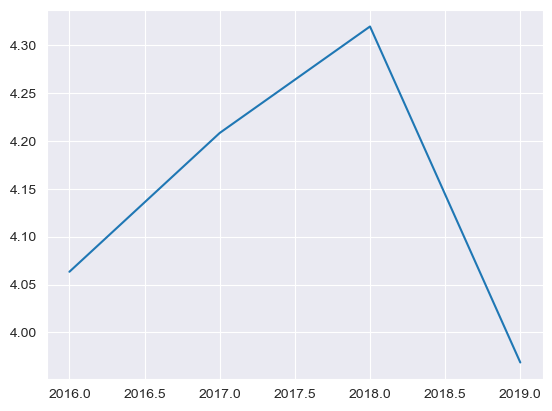

In [37]:
plt.plot(gdf.groupby('year')['frp'].mean())

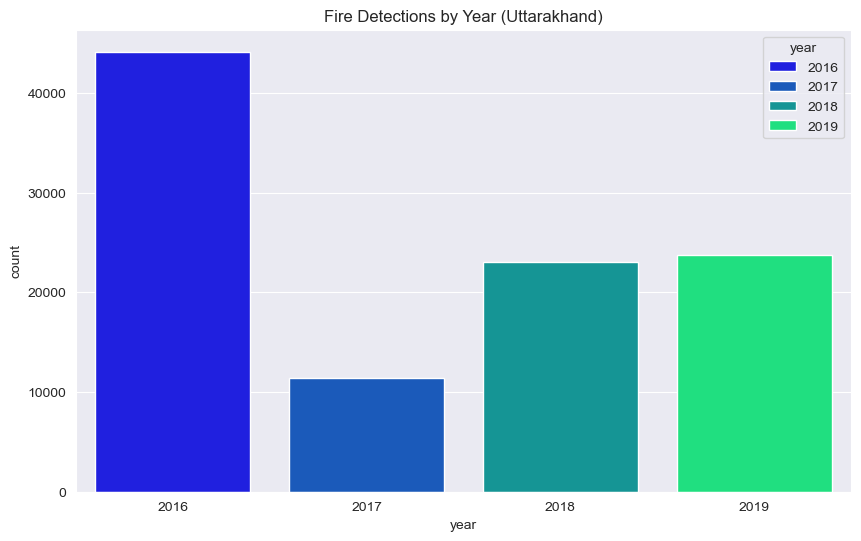

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data=gdf, x='year', palette='winter', hue='year')
plt.title("Fire Detections by Year (Uttarakhand)")
plt.show()

C:\Users\Shivam\AppData\Local\Temp\ipykernel_6992\4017540349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gdf, x='confidence', y='frp', palette='winter')


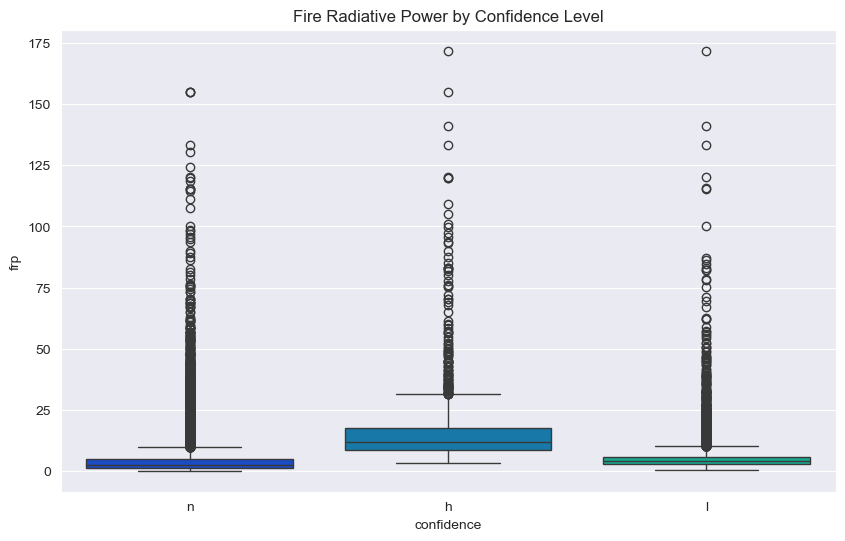

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(data=gdf, x='confidence', y='frp', palette='winter')
plt.title("Fire Radiative Power by Confidence Level")
plt.show()

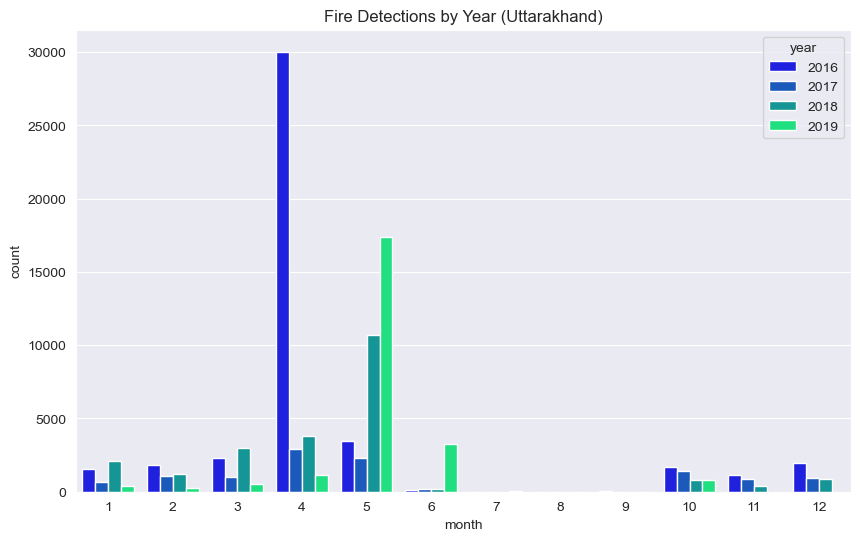

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data=gdf, x='month', palette='winter', hue='year')
plt.title("Fire Detections by Year (Uttarakhand)")
plt.show()